# **삼각 분할을 이용한 군집 강조 그래프 시각화**

Community-Enhanced Graph Visualization Using Triangulation


*   참여 인원: 정수환, 박종민, 임성수 (충남대학교 [데이터인텔리전스 연구실](https://www.cnudi.com/))
*   관련 논문: [그래프 클러스터링을 위한 삼각 분할 기반 임베딩](https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE09301897), [KSC 2019](https://www.kiise.or.kr/conference/main/index.do?CC=KSC&CS=2019)
*   연구 지원: 충남대학교 [바이오AI융합연구센터](https://bioai.cnu.ac.kr/*bioairc*/index.do)
*   코드 문의: 정수환 integerhwan@gmail.com

# 1. 프로그램 실행을 위한 준비 과정

In [1]:
# 파이썬 프로그램 실행을 위한 패키지 설치하기
# 패키지들의 버전이 다른 경우 아래 주석 처리(#)를 지우고 실행하여 설치 후 재실행하기
#!pip install networkx==1.9.1
#!pip install fa2l==0.2
#!pip install matplotlib==2.1.2
#!pip install scipy==1.5.4
#!pip install numpy==1.19.1

In [2]:
# 파이썬 프로그램 실행을 위한 패키지 불러오기
import networkx as nx
from fa2l import force_atlas2_layout
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import numpy as np
import operator

In [3]:
# 파이썬 그래프 및 이웃 노드 리스트 출력을 위한 옵션 (True/False 중 선택)
draw = True
print_contents = False

# 2. 그래프 데이터 입력 및 사용하기


In [4]:
# networkX 패키지를 사용하여 그래프 데이터 입력 받는 함수
# 그래프의 연결 리스트로부터 networkX의 그래프로 변환하기
def build_graph(path):
    edge_list = list()
    with open(path, 'r') as f:
        line = f.readline()
        while line:
            tokens = line.split('\t')
            edge = (int(tokens[0]), int(tokens[1]))
            edge_list.append(edge)
            line = f.readline()

        f.close()
    G = nx.Graph()
    G.add_edges_from(edge_list)
    mapping = dict(zip(G, range(len(G.nodes()))))
    G = nx.relabel_nodes(G, mapping)

    return G

In [5]:
# 그래프의 연결 리스트 입력 받기
from google.colab import files
files.upload()

Saving football.edges to football (2).edges


{'football.edges': b'0\t1\r\n0\t2\r\n0\t3\r\n0\t4\r\n0\t5\r\n0\t6\r\n0\t7\r\n0\t8\r\n0\t9\r\n0\t10\r\n0\t11\r\n0\t12\r\n1\t13\r\n1\t14\r\n1\t6\r\n1\t15\r\n1\t16\r\n1\t17\r\n1\t18\r\n1\t19\r\n1\t20\r\n1\t21\r\n1\t22\r\n2\t36\r\n2\t3\r\n2\t4\r\n2\t5\r\n2\t45\r\n2\t8\r\n2\t46\r\n2\t11\r\n2\t12\r\n2\t47\r\n3\t57\r\n3\t4\r\n3\t59\r\n3\t5\r\n3\t8\r\n3\t31\r\n3\t11\r\n3\t12\r\n3\t47\r\n4\t70\r\n4\t5\r\n4\t74\r\n4\t8\r\n4\t82\r\n4\t42\r\n4\t11\r\n4\t12\r\n5\t59\r\n5\t8\r\n5\t63\r\n5\t10\r\n5\t11\r\n5\t12\r\n5\t65\r\n6\t89\r\n6\t13\r\n6\t15\r\n6\t16\r\n6\t18\r\n6\t20\r\n6\t21\r\n6\t22\r\n7\t89\r\n7\t93\r\n7\t94\r\n7\t72\r\n7\t95\r\n7\t55\r\n7\t96\r\n7\t80\r\n7\t97\r\n7\t19\r\n8\t57\r\n8\t39\r\n8\t82\r\n8\t11\r\n8\t12\r\n9\t70\r\n9\t83\r\n9\t14\r\n9\t104\r\n9\t105\r\n9\t102\r\n9\t98\r\n9\t85\r\n9\t87\r\n9\t88\r\n10\t36\r\n10\t57\r\n10\t37\r\n10\t67\r\n10\t45\r\n10\t68\r\n10\t46\r\n11\t106\r\n11\t64\r\n11\t107\r\n11\t12\r\n12\t37\r\n12\t82\r\n12\t32\r\n12\t85\r\n12\t81\r\n13\t67\r\n13\t15\r\n13\t

In [6]:
# 그래프의 연결 리스트로부터 그래프로 변환하기
G = build_graph('football.edges')

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:511: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


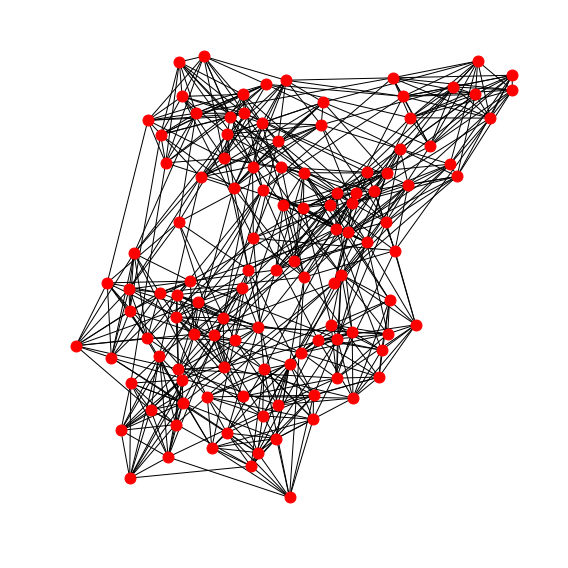

In [7]:
# 그래프 출력을 위한 코드 실행하기
if draw:
    plt.figure(figsize=(8, 8))
    nx.draw_networkx(G, with_labels=False, node_size=120)
    plt.tight_layout()
    plt.axis('off')

# 3. 초기 그래프 시각화: 파이썬 그래프 시각화

In [8]:
# 파이썬 그래프 시각화에서 널리 쓰이는 ForceAtlas2의 시각화 방식인 LinLog 시각화를 수행하는 함수
# LinLog 시각화를 통한 그래프 시각화 결과는 각 노드의 위치 정보를 반환함
# 각 노드의 위치를 positions에 저장하기
positions = force_atlas2_layout(G,
                                iterations=100,
                                pos_list=None,
                                node_masses=None,
                                outbound_attraction_distribution=False,
                                lin_log_mode=True,
                                prevent_overlapping=False,
                                edge_weight_influence=1.0,

                                jitter_tolerance=1.0,
                                barnes_hut_optimize=True,
                                barnes_hut_theta=0.5,

                                scaling_ratio=2.0,
                                strong_gravity_mode=False,
                                multithread=False,
                                gravity=1)

In [9]:
# positions의 key값이 무작위로 되어있어서, key값 순으로 정렬하는 작업 실행하기
sorted_positions = {}
for i in range(len(positions)):
    sorted_positions[i] = positions[i]

if print_contents:
    sorted_positions

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:511: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


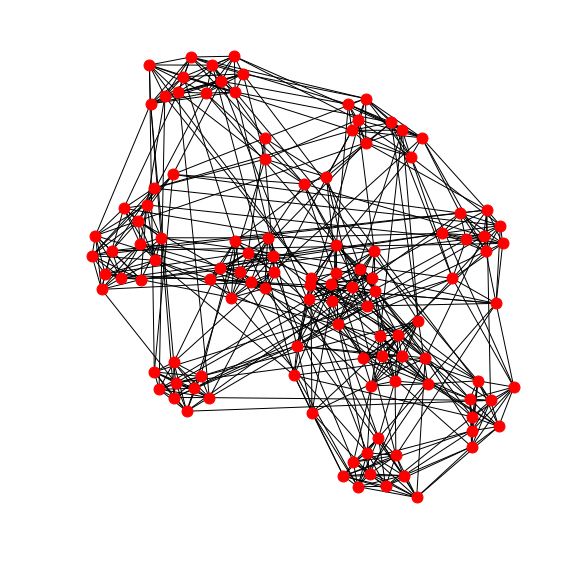

In [10]:
# 그래프 출력을 위한 코드 실행하기
if draw:
    plt.figure(figsize=(8,8))
    nx.draw_networkx(G, positions, node_size=120, with_labels=False)
    plt.tight_layout()
    plt.axis('off')
    plt.show()

# 4. 삼각 분할: 그래프 시각화 결과에 삼각 분할 적용

In [11]:
# dict -> list
dot_list = list(sorted_positions.values())

# 1 dim -> 2 dim (input form)
dot_list = [list(dot_list[i]) for i in range(len(dot_list))]

# list -> numpy array
dot_list = np.array(dot_list)
dot_list[:5]

array([[ 642.04373943, -513.41483343],
       [-352.27310499, -501.1196795 ],
       [ 577.04462817, -586.24824849],
       [ 575.04978823, -718.03301847],
       [ 568.81948695, -506.87220227]])

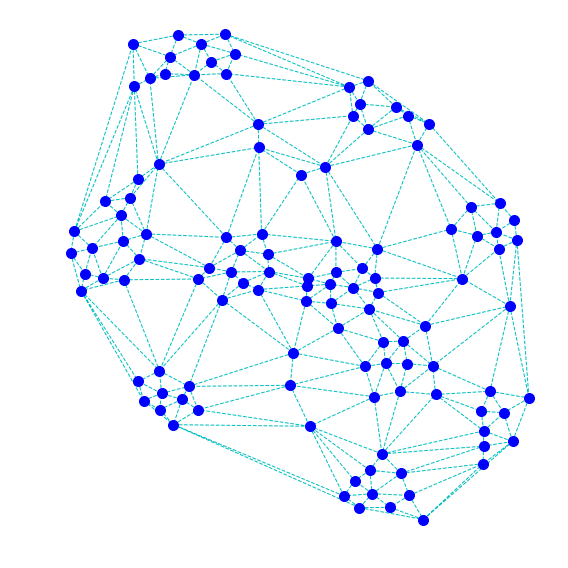

In [12]:
# Delaunay 삼각 분할을 사용하여 노드 위치 정보에 삼각 분할 적용하기
tri = Delaunay(dot_list, incremental= True)

# 그래프 출력을 위한 코드 실행하기
if draw:
    plt.figure(figsize=(8,8))
    plt.triplot(dot_list[:,0], dot_list[:,1], tri.simplices.copy(), 'c--', lw = 1)
    plt.plot(dot_list[:,0], dot_list[:,1] ,'o', color='b', markersize=10)
    plt.tight_layout()
    plt.axis('off')
    plt.show()

    tri.close()

In [13]:
# 삼각 분할 결과로 얻어지는 삼각 연결 구조를 tri_edges에 저장하기
tri_edges = set()

# for each Delaunay triangle
for n in tri.simplices:
    # for each edge of the triangle
    # sort the vertices
    # (sorting avoids duplicated edges being added to the set)
    # and add to the edges set
    edge = sorted([n[0], n[1]])
    tri_edges.add((edge[0], edge[1]))
    edge = sorted([n[0], n[2]])
    tri_edges.add((edge[0], edge[1]))
    edge = sorted([n[1], n[2]])
    tri_edges.add((edge[0], edge[1]))
    
# 삼각 연결 구조에 속하는 연결들을 출력하기
tri_edges = sorted(tri_edges, key=operator.itemgetter(0,1))

if print_contents:
    print(tri_edges)

In [14]:
# edge를 변수로 저장하기
edge_list = G.edges()

# reverse list 생성하기
edge_list_reverse = []
for a, b in edge_list:
    edge_list_reverse.append(tuple((b,a)))
    
edge_list = edge_list + edge_list_reverse

# edge list 정렬하기
edge_list = sorted(edge_list, key=operator.itemgetter(0,1))

if print_contents:
    print(edge_list[:10])

In [15]:
# neighbor_dict = {node: [neighbors]} 꼴로 표현
from collections import defaultdict
neighbor_dict = defaultdict(list)

# 이웃들을 추가하는 과정
for src, des in edge_list:
    if src in neighbor_dict:
        neighbor_dict[src].append(des)
    else:
        neighbor_dict[src] = [src] # 자기 자신도 이웃 리스트에 추가
        neighbor_dict[src].append(des)      

In [16]:
# 연결 정보 출력하기
if print_contents:
    print(neighbor_dict)

# 5. 최종 그래프 시각화: 유사도를 고려한 군집 강조 시각화

In [17]:
# 두개의 리스트를 매개변수로 받아서, 유사도를 반환(return type : float)
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    if union == 0:
        return 0
    return float(intersection) / union

In [18]:
# tri_edges 인덱스 순으로 저장
similarity = [jaccard_similarity(neighbor_dict[u],neighbor_dict[v]) for (u,v) in tri_edges]

if print_contents:
    print('삼각형을 이루는 edge 수:', len(tri_edges))
    print('similarity Array 길이:', len(similarity))
    print(similarity[:5])

In [19]:
# 삼각형을 이루는 엣지들의 좌표값을 가지고 있는 dictionary
tri_edge_dict = defaultdict(list)
for i in range(len(tri_edges)):
    tri_edge_dict[i].append(positions[tri_edges[i][0]])
    tri_edge_dict[i].append(positions[tri_edges[i][1]])
    
if print_contents:
    tri_edge_dict

(-841.7070039002069,
 798.8278909727584,
 -1040.2016073051257,
 1105.9971517682338)

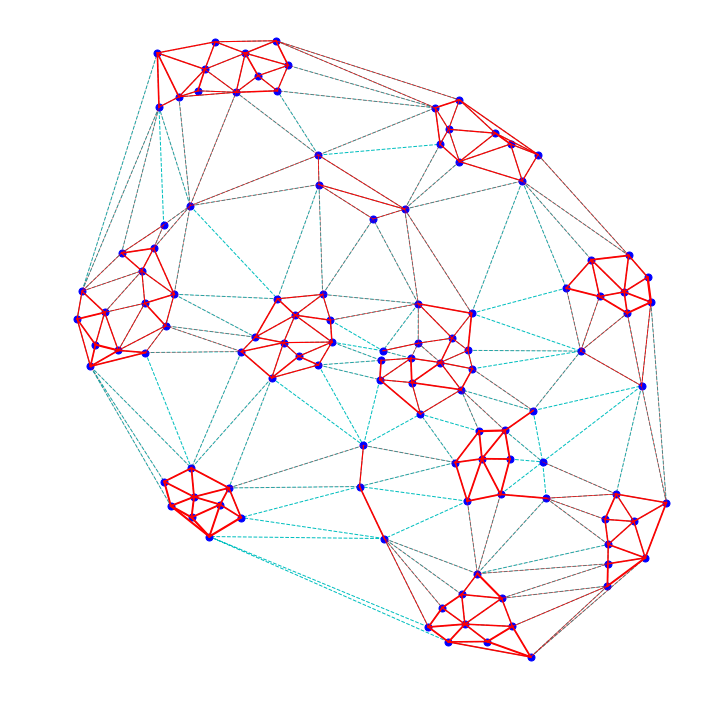

In [20]:
# 삼각 구조에 속하는 연결 중 유사도가 높은 경우 진하고 굵게, 유사도가 낮은 경우 옅고 얇게 표현하기
# 그래프를 희소화(sparsification)하고 주요 군집 정보를 시각화하여 표현할 수 있음
tri = Delaunay(dot_list, incremental= True)
plt.figure(figsize=(10,10))
plt.triplot(dot_list[:,0], dot_list[:,1], tri.simplices.copy(), 'c--', lw = 1)
plt.plot(dot_list[:,0], dot_list[:,1] ,'o', color='b',markersize=7)

for i in range(len(tri_edge_dict)):
    x = [tri_edge_dict[i][0][0],tri_edge_dict[i][1][0]]
    y = [tri_edge_dict[i][0][1],tri_edge_dict[i][1][1]]

    plt.plot(x,y,color='r',linewidth=similarity[i]*3)
plt.tight_layout()
plt.axis('off')